# M4- W4 Prpject

# Investigate the Airbnb 

# Business Scope : Advice from Airbnb to Host

How Airbnb can help host to rent their houses in best price.

In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# reading the csv file
CS=pd.read_csv('calendar_summary.csv')

In [4]:
#check the head
CS.head()

,listing_id,date,available,price
0,2015,2019-09-10,f,NaN
1,2015,2019-09-09,f,NaN
2,2015,2019-09-08,f,NaN
3,2015,2019-09-07,f,NaN
4,2015,2019-09-06,f,NaN


In [5]:
CS.shape

(8231480, 4)

In [6]:
# reading the csv file
L=pd.read_csv('listings.csv')

In [7]:
L.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26


In [8]:
L.shape

(22552, 16)

In [9]:
# reading the csv file
LS=pd.read_csv('listings_summary.csv')


In [10]:
LS.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,t,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,https://www.airbnb.com/rooms/3309,20181107122246,2018-11-07,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,https://www.airbnb.com/rooms/7071,20181107122246,2018-11-07,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,t,NaN,NaN,f,f,moderate,f,f,1,1.75


In [11]:
LS.shape

(22552, 96)

In [12]:
#change the type of date into datetime and save it in new column by name 'Date'
CS['date']=pd.to_datetime(CS['date'])

In [13]:
# calculate the sum of the none value
CS.price.isna().sum()

6430639

In [14]:
# remover the $ sign
CS['price']=CS['price'].str.replace('$','')

In [15]:
# change price to numeric
CS['price']=pd.to_numeric(CS['price'],errors='coerce')

In [16]:
CST=CS[CS['available']=='t']

In [17]:
 #create the new column data restructuring the original Date column with pd.to_datetime
#calculate day of year
CST['day'] = CS['date'].dt.dayofyear
CST['month']=CS['date'].dt.month
CST['week']=CS['date'].dt.weekofyear
# Create year
CST['Year'] = CS['date'].dt.year

#to divide by season it's better to use the day of the year instead of the months
spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)
# winter = everything else

daje = []
for i in CST['day']:
    if i in spring:
        season = 'spring'
    elif i in summer:
        season = 'summer'
    elif i in fall:
        season = 'fall'
    else:
        season = 'winter'
    daje.append(season)   

#add the resulting column to the dataframe (after transforming it as a Series)
CST['season']= pd.Series(daje)

Text(0.5, 1.0, 'The number of rent in each month of year')

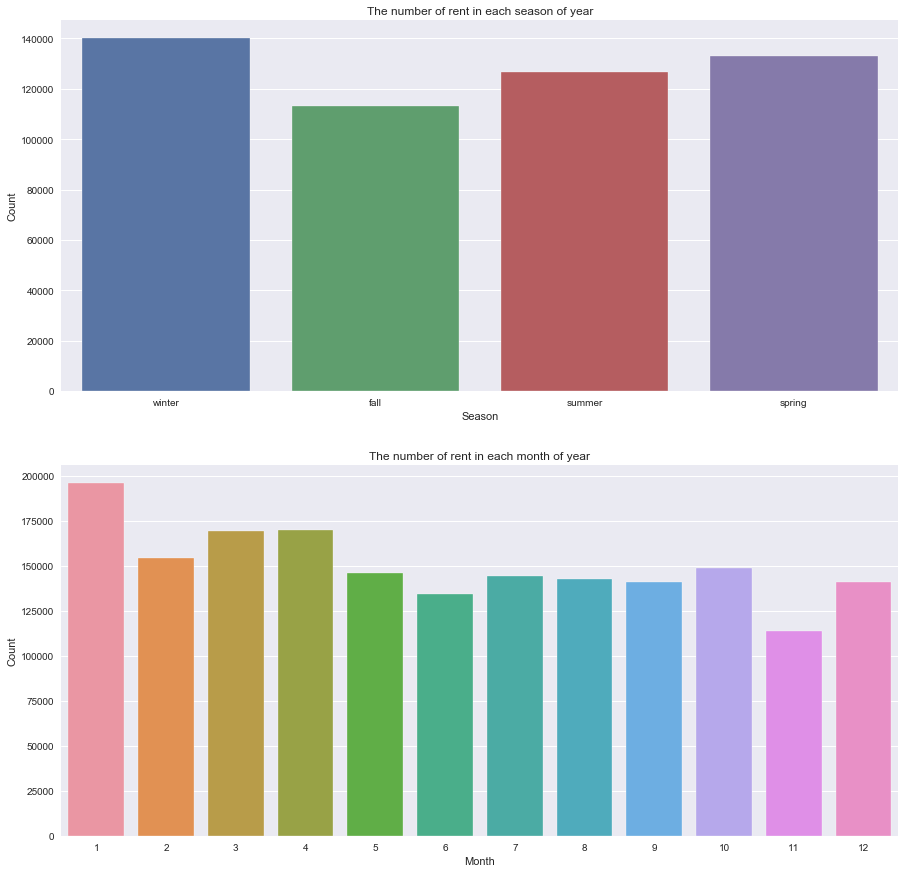

In [18]:
# Suplots of time of the year 
sns.set_style('darkgrid')
f, axes = plt.subplots(2, figsize = (15,15))


# Plot [0,0]
#making the bar chart for number of selling based on season
sns.countplot(CST['season'], ax = axes[0])
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Count')
axes[0].set_title('The number of rent in each season of year')

# Plot [0,1]
#making the bar chart for number of sell based on month
sns.countplot(CST['month'], ax = axes[1])
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Count')
axes[1].set_title('The number of rent in each month of year')

In [19]:
#calculate the mean price based on month, week, year, season
price_behave=CST[['Year','month','week','season','price']]
price_year_mean=price_behave.groupby('Year').mean()
price_month_mean=price_behave.groupby('month').mean()
price_week_mean=price_behave.groupby('week').mean()
price_season_mean=price_behave.groupby('season').mean()


Text(0.5, 1.0, 'Average price of rent in each season of year')

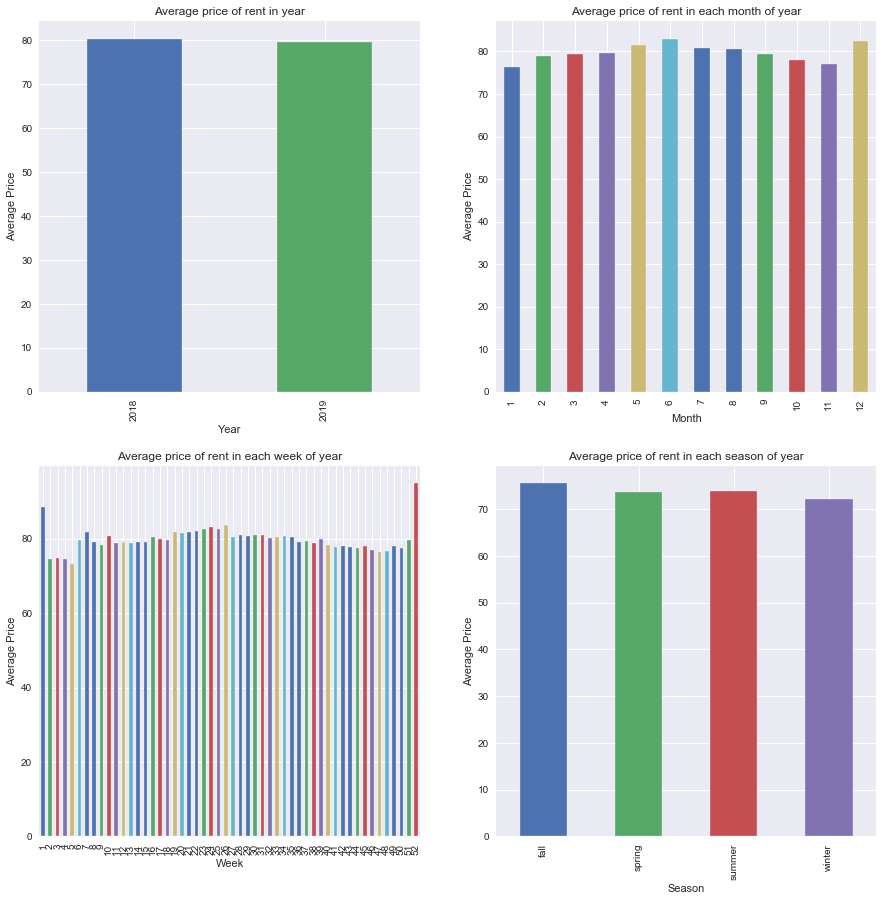

In [20]:
# Suplots of time of the year 
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
# making bar chart for the number of selling in the year
#sns.countplot(price_year_mean['price'], ax = axes[0, 0])
price_year_mean['price'].plot(kind='bar',ax = axes[0, 0])
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Average Price')
axes[0,0].set_title('Average price of rent in year')

# Plot [0,1]
#making the bar chart for number of selling based on season
#sns.countplot(price_season_mean['price'], ax = axes[0, 1])
price_month_mean['price'].plot(kind='bar',ax = axes[0, 1])
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Average Price')
axes[0,1].set_title('Average price of rent in each month of year')

# Plot [1,0]
#making the bar chart for number of sell based on month
#sns.countplot(price_month_mean['price'], ax = axes[1, 0])
price_week_mean['price'].plot(kind='bar',ax = axes[1, 0])
axes[1,0].set_xlabel('Week')
axes[1,0].set_ylabel('Average Price')
axes[1,0].set_title('Average price of rent in each week of year')

# Plot [1,1]
#making the bar chart for nuber of  sell by weeks.
#sns.countplot(price_week_mean['price'], ax = axes[1, 1])
price_season_mean['price'].plot(kind='bar',ax = axes[1, 1])
axes[1,1].set_xlabel('Season')
axes[1,1].set_ylabel('Average Price')
axes[1,1].set_title('Average price of rent in each season of year')

# Looking for features that directly can increase the price

In [21]:
# check the dataset 
LS.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,t,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,https://www.airbnb.com/rooms/3309,20181107122246,2018-11-07,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,https://www.airbnb.com/rooms/7071,20181107122246,2018-11-07,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,t,NaN,NaN,f,f,moderate,f,f,1,1.75


In [22]:
#check the number of records and columns
LS.shape

(22552, 96)

# Data cleaning for specific columns we need to use

In [23]:
# define the columns we want to keep
columns_to_keep = ['id', 'neighbourhood_group_cleansed', 
                   'property_type', 'room_type', 'accommodates', 'bathrooms',  
                   'bedrooms', 'amenities', 'square_feet', 'price', 'cleaning_fee', 
                   'security_deposit', 'extra_people', 'guests_included',  
                   'instant_bookable']

#set id as index
LS_new = LS[columns_to_keep].set_index('id')
print("The dataset has {} rows and {} columns - after dropping irrelevant columns.".format(*LS_new.shape))

The dataset has 22552 rows and 14 columns - after dropping irrelevant columns.


In [24]:
#check some columns we need to analysis
LS_new[['price', 'amenities', 'square_feet', 'bedrooms']].head()

,price,amenities,square_feet,bedrooms
id,,,,
2015,$60.00,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,1.0
2695,$17.00,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,1.0
3176,$90.00,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,1.0
3309,$26.00,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",0.0,1.0
7071,$42.00,"{Wifi,Heating,""Family/kid friendly"",Essentials...",NaN,1.0


In [25]:
# checking Nan's in "price" column
LS_new.price.isna().sum()

0

In [26]:
LS_new.square_feet.isna().sum()

22106

In [27]:
LS_new.square_feet.fillna('unknown', inplace=True)
LS_new.square_feet.isna().sum()

0

In [28]:
# remove $ and , 
LS_new.price = LS_new.price.astype(str).str.replace('$', '').str.replace(',', '').astype(float)


In [29]:
#let see price in details
LS_new['price'].describe()

count    22552.000000
mean        67.143668
std        220.266210
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

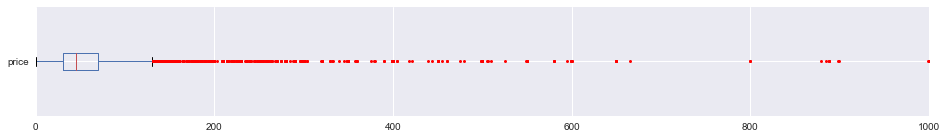

In [30]:
#create box plot for find the outliers
Boxprice = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
LS_new['price'].plot(kind='box', xlim=(0, 1000), vert=False, flierprops=Boxprice, figsize=(16,2));

In [31]:
#remove upper than 600 and see the distribution
LS_new = LS_new[LS_new["price"] < 600]

46.63081884451465

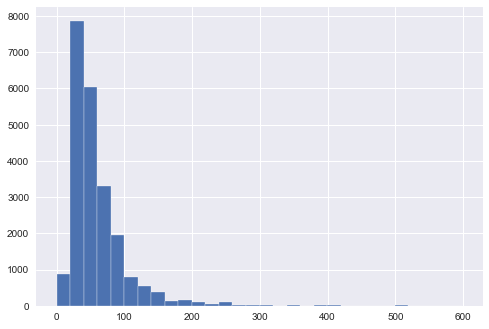

In [32]:
#plot distribution
LS_new["price"].hist(bins = 30)
LS_new["price"].std()

In [33]:
# remove upper than 300
LS_new = LS_new[LS_new["price"] < 300]

38.162050086030256

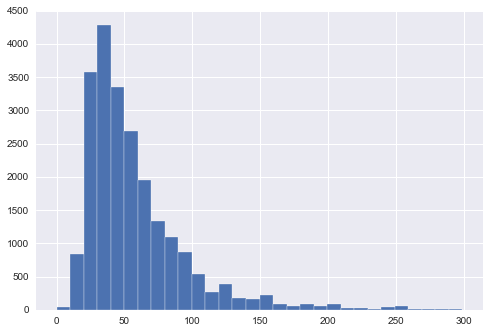

In [34]:
# checking the distribution again
LS_new["price"].hist(bins = 30)
LS_new["price"].std()

In [35]:
#cleaning the bedroom column and change it to str type
LS_new["bedrooms"] = LS_new["bedrooms"].astype("str")

In [36]:
#LS_new["bedrooms"] = LS_new["bedrooms"].fillna(0.5) #these are studios
LS_new["bedrooms"] = LS_new["bedrooms"].fillna('studio') #these are studios

In [37]:
LS_new["bedrooms"]=pd.to_numeric(LS_new["bedrooms"],errors='coerce')


In [38]:
LS_new["square_feet"]=pd.to_numeric(LS_new["square_feet"],errors='coerce')

In [39]:
LS_new.head(100)

,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,amenities,square_feet,price,cleaning_fee,security_deposit,extra_people,guests_included,instant_bookable
id,,,,,,,,,,,,,,
2015,Mitte,Guesthouse,Entire home/apt,3,1.0,1.0,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,60.0,$30.00,$200.00,$28.00,1,f
2695,Pankow,Apartment,Private room,2,1.0,1.0,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,17.0,$0.00,$0.00,$0.00,1,f
3176,Pankow,Apartment,Entire home/apt,4,1.0,1.0,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,90.0,$50.00,$200.00,$20.00,2,t
3309,Tempelhof - Schöneberg,Apartment,Private room,2,1.0,1.0,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",0.0,26.0,$30.00,$250.00,$18.00,1,f
7071,Pankow,Apartment,Private room,2,1.0,1.0,"{Wifi,Heating,""Family/kid friendly"",Essentials...",NaN,42.0,$0.00,$0.00,$24.00,1,f
9991,Pankow,Apartment,Entire home/apt,7,2.5,4.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",NaN,180.0,$80.00,$400.00,$10.00,5,f
14325,Pankow,Apartment,Entire home/apt,2,1.0,0.0,"{TV,Internet,Wifi,Kitchen,""Buzzer/wireless int...",NaN,70.0,$0.00,$500.00,$0.00,1,f
16401,Friedrichshain-Kreuzberg,Apartment,Private room,2,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Smoking ...",NaN,120.0,NaN,NaN,$13.00,1,f
16644,Friedrichshain-Kreuzberg,Apartment,Entire home/apt,5,1.0,1.0,"{TV,Wifi,Kitchen,""Buzzer/wireless intercom"",He...",0.0,90.0,$50.00,$500.00,$20.00,2,f


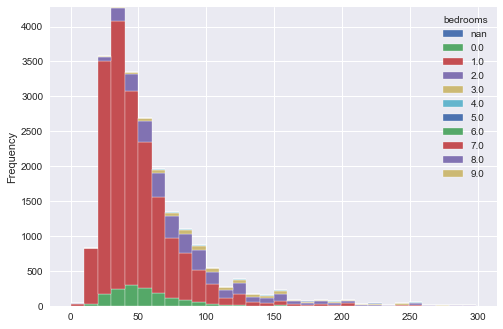

In [40]:
(LS_new.pivot(columns = 'bedrooms', values = "price")
         .plot.hist(bins = 30, stacked = True))

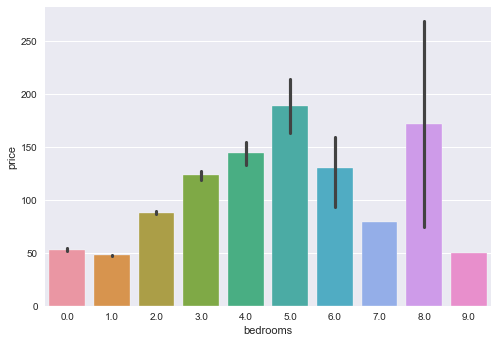

In [41]:
sns.barplot(x = "bedrooms", y = "price", data =LS_new )

plt.figure(figsize = (12, 6))
sns.boxplot(x = 'bedrooms', y = 'price',  data = LS_new)
xt = plt.xticks(rotation=90)

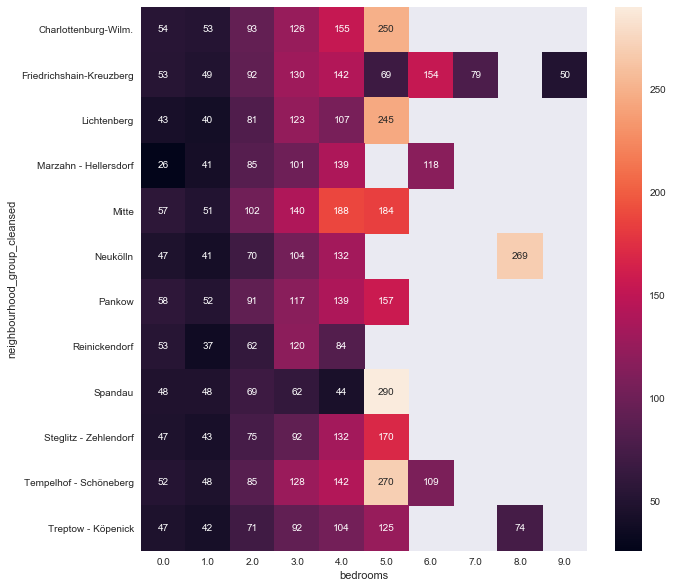

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(LS_new.groupby([
        'neighbourhood_group_cleansed', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f")

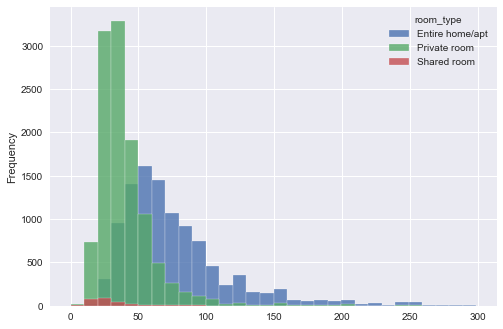

In [43]:
(LS_new.pivot(columns = "room_type", values = "price")
         .plot.hist(bins = 30, stacked = False, alpha = 0.8))

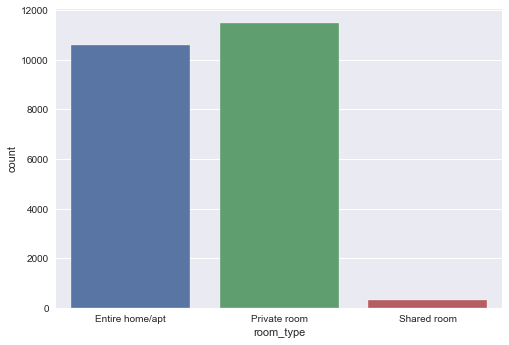

In [44]:
sns.countplot( LS_new['room_type'] )

plt.figure(figsize = (12, 6))
sns.boxplot(x = 'neighbourhood_group_cleansed', y = 'price',  data = LS_new)
xt = plt.xticks(rotation=90)

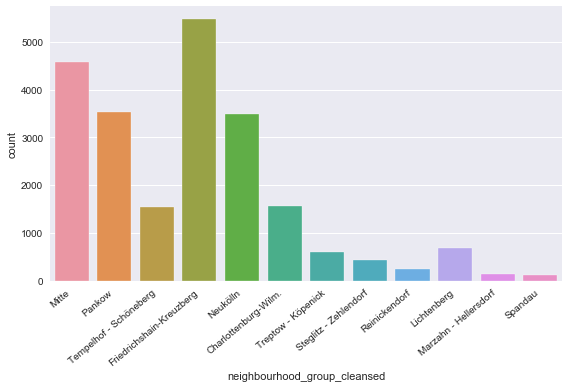

In [45]:
new_plot = sns.countplot( LS_new['neighbourhood_group_cleansed'] )
new_plot.set_xticklabels(new_plot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

sns.violinplot('neighbourhood_group_cleansed', 'price', data = LS_new)
xt = plt.xticks(rotation=90)

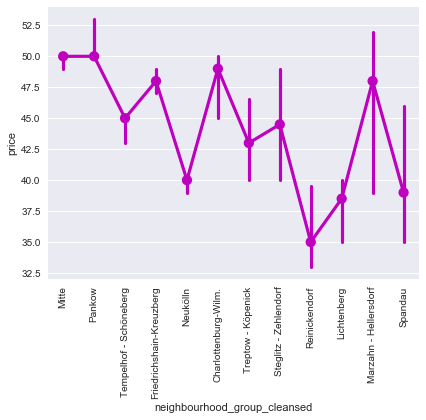

In [46]:
sns.factorplot('neighbourhood_group_cleansed', 'price', data = LS_new, color = 'm', \
               estimator = np.median, size = 4.5,  aspect=1.35)
xt = plt.xticks(rotation=90)

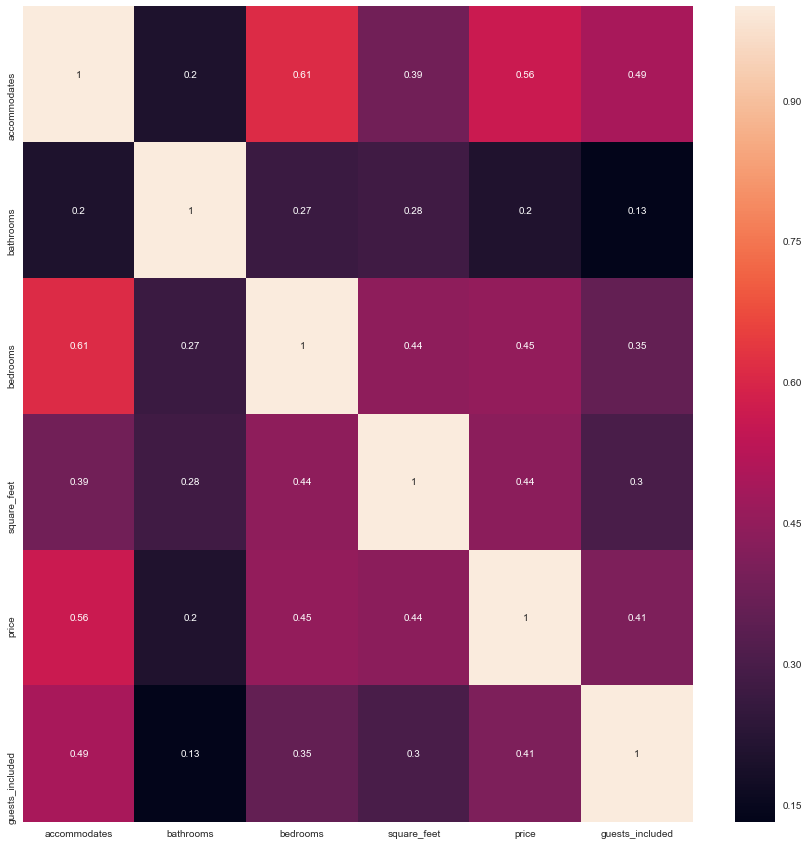

In [47]:
#making heatmap for finding the correlation between variable
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(LS_new.corr(), annot=True)

plt.figure(figsize = (12, 6))
sns.boxplot(x = 'accommodates', y = 'price',  data = LS_new)
xt = plt.xticks(rotation=90)

In [48]:
LS_new.amenities = LS_new.amenities.str.replace("[{}]", "").str.replace('"', "")
LS_new['amenities'].head()

id
2015    TV,Cable TV,Wifi,Kitchen,Gym,Heating,Family/ki...
2695    Wifi,Kitchen,Elevator,Heating,Washer,Essential...
3176    Internet,Wifi,Kitchen,Buzzer/wireless intercom...
3309    Internet,Wifi,Pets allowed,Pets live on this p...
7071    Wifi,Heating,Family/kid friendly,Essentials,Sh...
Name: amenities, dtype: object

In [49]:
# Create a count of most common amenities
Amenities = LS_new['amenities'].tolist()
Am = str(Amenities)
Am = Am.replace("[","")
Am = Am.replace("]","")
Am = Am.replace("'","")
Am = Am.replace(" Wifi","Wifi")
Am1 = str.split(Am,",")

#import counter 
from collections import Counter
Counter(Am1).most_common(20)

[('Wifi', 21339),
 ('Heating', 21021),
 ('Kitchen', 20730),
 ('Essentials', 20156),
 ('Washer', 18361),
 ('Hair dryer', 14745),
 ('Laptop friendly workspace', 14327),
 ('Hangers', 13766),
 ('Iron', 11075),
 ('Shampoo', 10529),
 (' TV', 9952),
 ('Hot water', 9637),
 ('Family/kid friendly', 8046),
 ('Host greets you', 6616),
 ('Smoke detector', 6356),
 ('Buzzer/wireless intercom', 6077),
 ('Lock on bedroom door', 5243),
 ('Refrigerator', 5156),
 ('Free street parking', 5151),
 ('Dishes and silverware', 5031)]

In [50]:
LS_new['Wifi'] = LS_new.amenities.str.contains('Wifi')
LS_new['Heating'] = LS_new.amenities.str.contains('Heating')
LS_new['Kitchen'] = LS_new.amenities.str.contains('Kitchen')
LS_new['Essentials'] = LS_new.amenities.str.contains('Essentials')
LS_new['Washer'] = LS_new.amenities.str.contains('Washer')
LS_new['Hair dryer'] = LS_new.amenities.str.contains('Hair dryer')
LS_new['Laptop friendly workspace'] = LS_new.amenities.str.contains('Laptop friendly workspace')
LS_new['Hangers'] = LS_new.amenities.str.contains('Hangers')
LS_new['Iron'] = LS_new.amenities.str.contains('Iron')
LS_new['Shampoo'] = LS_new.amenities.str.contains('Shampoo')
LS_new['TV'] = LS_new.amenities.str.contains('TV')
LS_new['Hot water'] = LS_new.amenities.str.contains('Hot water')
LS_new['Family/kid friendly'] = LS_new.amenities.str.contains('Family/kid friendly')
LS_new['Host greets you'] = LS_new.amenities.str.contains('Host greets you')
LS_new['Smoke detector'] = LS_new.amenities.str.contains('Smoke detector')
LS_new['Buzzer/wireless intercom'] = LS_new.amenities.str.contains('Buzzer/wireless intercom')
LS_new['Lock on bedroom door'] = LS_new.amenities.str.contains('Lock on bedroom door')
LS_new['Refrigerator'] = LS_new.amenities.str.contains('Refrigerator')
LS_new['Free street parking'] = LS_new.amenities.str.contains('Free street parking')
LS_new['Dishes and silverware'] = LS_new.amenities.str.contains('Dishes and silverware')

In [51]:
LS_price_top20amenities = LS_new[['price', 'Wifi', 'Heating', 'Kitchen', 'Essentials', 'Washer', 'Hair dryer', 'Laptop friendly workspace', 'Hangers', 'Iron', 'Shampoo', 'TV', 'Hot water','Family/kid friendly', 'Host greets you', 'Smoke detector','Buzzer/wireless intercom','Lock on bedroom door', 'Refrigerator', 'Free street parking', 'Dishes and silverware']]

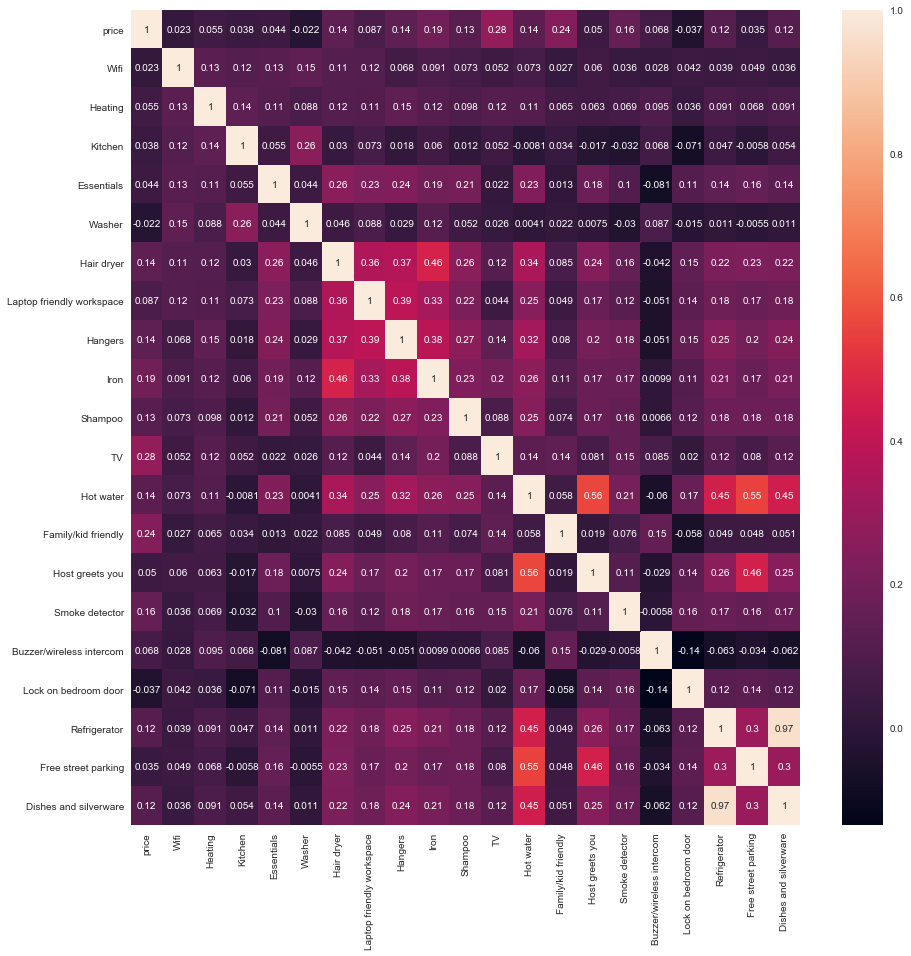

In [52]:
#making heatmap for finding the correlation between variable
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(LS_price_top20amenities.corr(), annot=True)